In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import diags, linalg
import warnings
import time

warnings.filterwarnings("ignore")

In [2]:
alpha=1
beta=1
# u_t = alpha*u_xx+beta*u*(1-u)

def fisher(x, t): return (1+np.exp((beta/(6*alpha))**0.5*x-5*beta*t/6))**(-2)
def FFF(u): return beta*u*(1-u)
def u_x_ta(x,t=0): return (1+np.exp((beta/(6*alpha))**0.5*x-5*beta*t/6))**(-2)
def u_xa_t(t,x=0): return (1+np.exp((beta/(6*alpha))**0.5*x-5*beta*t/6))**(-2)
def u_xb_t(t,x=1): return (1+np.exp((beta/(6*alpha))**0.5*x-5*beta*t/6))**(-2)

(501, 501) (501, 501)


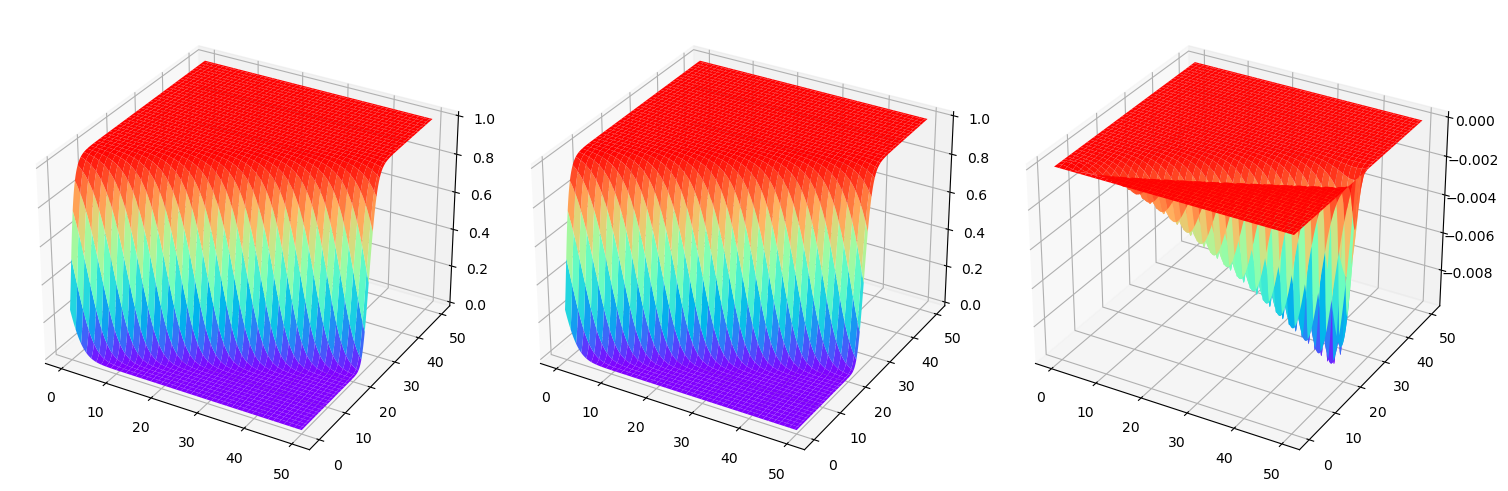

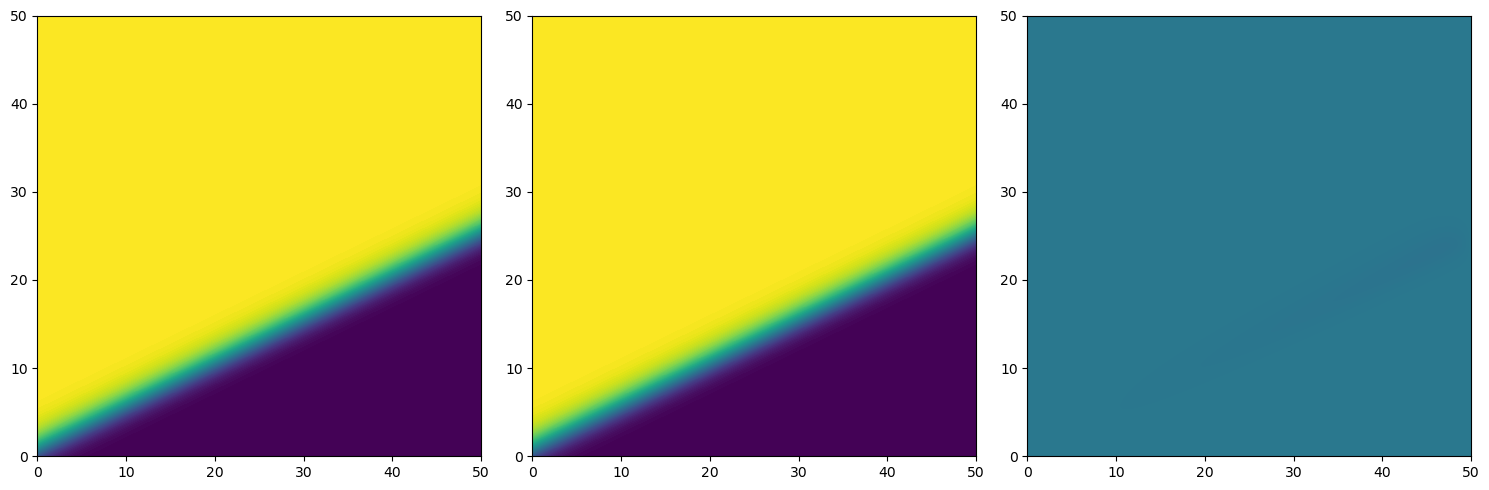

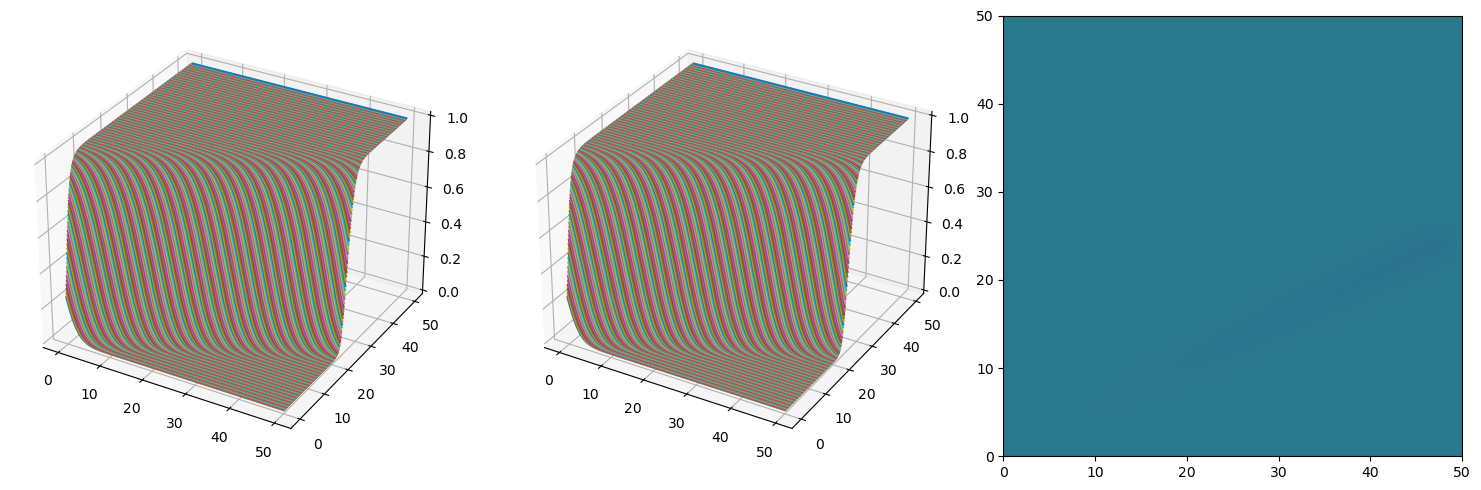

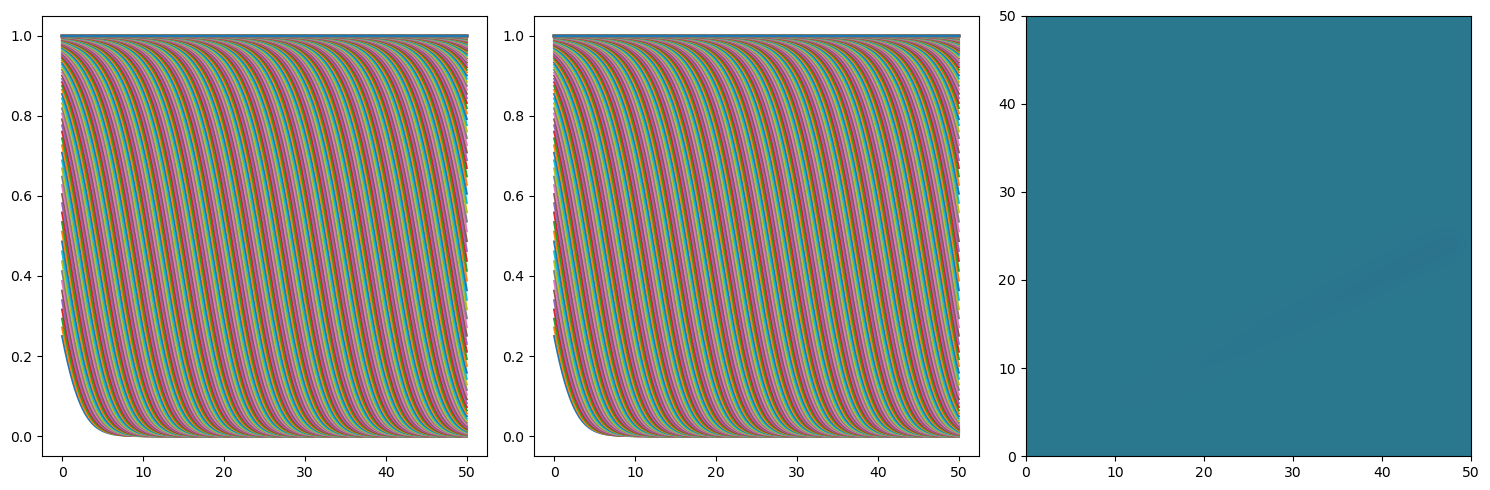

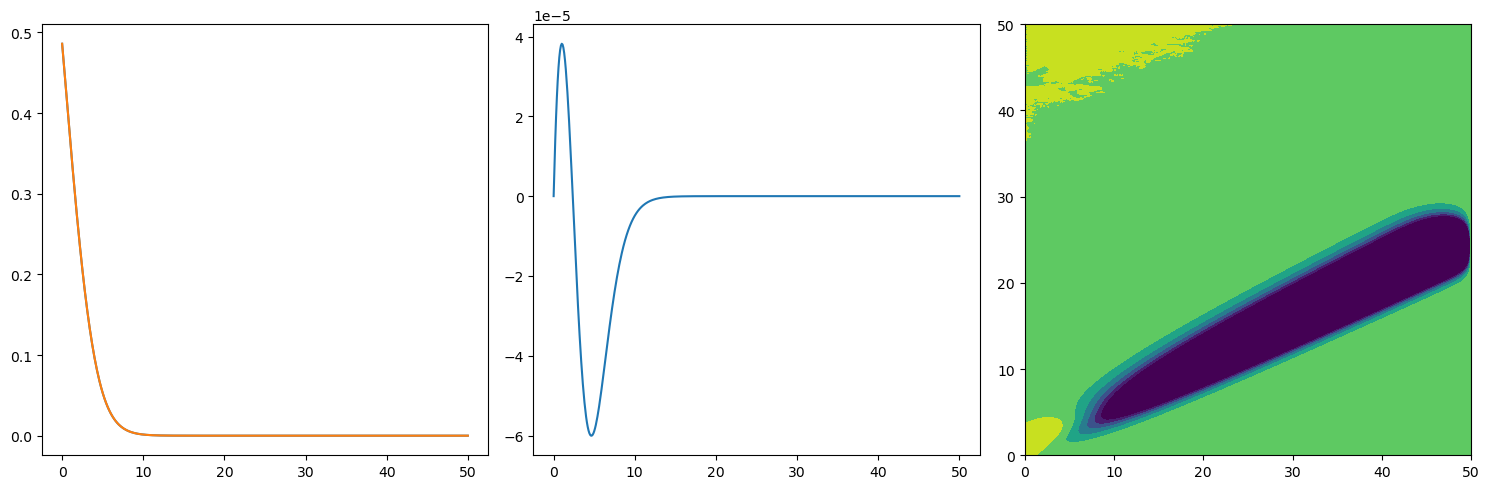

r=10.0000 9.738814e-03
程序运行时间:63.0314257144928秒


In [3]:
def cn(a, b, Nx, Nt):
    xx = np.linspace(a, b, Nx + 1, endpoint=True)
    h = (b-a) / Nx
    tt = np.linspace(a, b, Nt + 1, endpoint=True)
    tau = (b-a) / Nt

    sol = np.zeros([Nx + 1, Nt + 1])

    sol[:, 0] = u_x_ta(x=xx, t=a)
    sol[0, 1:] = u_xa_t(t=tt[1:], x=a)
    sol[-1, 1:] = u_xb_t(t=tt[1:], x=b)

    xx_mesh, tt_mesh = np.meshgrid(xx, tt)
    gg = fisher(x=xx_mesh, t=tt_mesh)
    r = alpha * tau / h / h

    # f(u)差分1
    # A = diags([[-r / 2] * (Nx - 2), [1 + r] * (Nx - 1),
    #           [-r / 2] * (Nx - 2)], [-1, 0, 1])
    # B = diags([[r / 2] * (Nx - 2), [1 - r] * (Nx - 1),
    #           [r / 2] * (Nx - 2)], [-1, 0, 1])
    # for t_idx in range(Nt):
    #     _f = np.zeros(Nx - 1)
    #     _f = _f + tau * FFF(u=sol[1:-1, t_idx])
    #     _f[0] += r / 2 * (sol[0, t_idx + 1] + sol[0, t_idx])
    #     _f[-1] += r / 2 * (sol[-1, t_idx + 1] + sol[-1, t_idx])
    #     sol[1:-1, t_idx + 1] = linalg.spsolve(A, B * sol[1:-1, t_idx] + _f)

    # f(u)差分2
    A = diags([[-r / 2] * (Nx - 2), [1 + r] * (Nx - 1),
              [-r / 2] * (Nx - 2)], [-1, 0, 1])
    B = diags([[r / 2] * (Nx - 2), [1 - r] * (Nx - 1),
              [r / 2] * (Nx - 2)], [-1, 0, 1])
    for t_idx in range(Nt):
        _f = sol[1:-1, t_idx]
        C = np.zeros(Nx - 1)
        C[0] += r / 2 * (sol[0, t_idx + 1] + sol[0, t_idx])
        C[-1] += r / 2 * (sol[-1, t_idx + 1] + sol[-1, t_idx])
        D = B * _f + tau / 2 * FFF(u=_f) + C
        __f = _f.copy()
        for iii in range(2):
            delta = linalg.inv(A - diags(tau / 2 * (1 - 2 * __f))) * \
                (A * __f - tau / 2 * FFF(u=__f) - D)
            __f = __f - delta
        sol[1:-1, t_idx+1] = __f

    print(gg.shape, sol.shape)
    fig = plt.figure(figsize=(15, 5))
    fig.set_tight_layout(True)
    ax = fig.add_subplot(131, projection='3d')
    ax.plot_surface(xx_mesh, tt_mesh, gg, cmap="rainbow")
    ax = fig.add_subplot(132, projection='3d')
    ax.plot_surface(xx_mesh, tt_mesh, sol.T, cmap="rainbow")
    ax = fig.add_subplot(133, projection='3d')
    ax.plot_surface(xx_mesh, tt_mesh, gg-sol.T, cmap="rainbow")
    plt.show()
    
    fig = plt.figure(figsize=(15, 5))
    fig.set_tight_layout(True)
    ax = fig.add_subplot(131)
    ax.contourf(xx_mesh, tt_mesh, gg, vmin=0, vmax=1, levels=100)
    ax = fig.add_subplot(132)
    ax.contourf(xx_mesh, tt_mesh, sol.T, vmin=0, vmax=1, levels=100)
    ax = fig.add_subplot(133)
    ax.contourf(xx_mesh, tt_mesh, gg-sol.T, vmin=-0.2, vmax=0.3, levels=100)
    plt.show()

    fig = plt.figure(figsize=(15, 5))
    fig.set_tight_layout(True)
    ax = fig.add_subplot(131, projection='3d')
    for kllk in range(gg.shape[0]):
        ax.plot3D(xx_mesh[kllk],tt_mesh[kllk],gg[kllk,:])
    ax = fig.add_subplot(132, projection='3d')
    for kllk in range(gg.shape[0]):
        ax.plot3D(xx_mesh[kllk],tt_mesh[kllk],sol.T[kllk,:])
    ax = fig.add_subplot(133)
    ax.contourf(xx_mesh, tt_mesh, gg-sol.T, vmin=-0.2, vmax=0.3, levels=100)
    plt.show()

    fig = plt.figure(figsize=(15, 5))
    fig.set_tight_layout(True)
    ax = fig.add_subplot(131)
    for kllk in range(gg.shape[0]):
        ax.plot(xx_mesh[kllk],gg[kllk,:])
    ax = fig.add_subplot(132)
    for kllk in range(gg.shape[0]):
        ax.plot(xx_mesh[kllk],sol.T[kllk,:])
    ax = fig.add_subplot(133)
    ax.contourf(xx_mesh, tt_mesh, gg-sol.T, vmin=-0.2, vmax=0.3, levels=100)
    plt.show()

    fig = plt.figure(figsize=(15, 5))
    fig.set_tight_layout(True)
    ax = fig.add_subplot(131)
    ax.plot(xx,gg[int(1/tau),:])
    ax.plot(xx,sol.T[int(1/tau),:])
    ax = fig.add_subplot(132)
    ax.plot(xx,gg[int(1/tau),:] - sol.T[int(1/tau),:])
    ax = fig.add_subplot(133)
    ax.contourf(xx_mesh, tt_mesh, gg-sol.T, vmin=-0.0005, vmax=0.0001, levels=100)
    plt.show()
    
    print(f"r={r:.4f}", f"{np.max(np.abs(gg - sol.T)):.6e}")


T1 = time.time()
cn(0, 50, 500, 500)
T2 = time.time()
print('程序运行时间:%s秒' % (T2 - T1))